In [2]:
import os
import mne
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(__doc__)

Automatically created module for IPython interactive environment


In [4]:
fifs = pd.DataFrame(columns=('id', 'path'))
for subject in ['QYJ', 'ZYF']:
    for task, jj in [('Test', 8), ('Training', 6)]:
        for j in range(0+1, jj+1):
            fifs = fifs.append(
                [{
                    'id': '{subject}_{task}_{j}'.format(subject=subject, task=task, j=j),
                    'path': os.path.join('rawdata', subject, 'Multi{task}_{j}_raw_tsss.fif'.format(task=task, j=j)),
                }],
                ignore_index=True)

def fetch(id):
    print('-' * 80)
    print(id)
    path = fifs[fifs['id'] == id]['path'].values[0]
    print(path)
    return path

fifs

id                                      path
0       QYJ_Test_1      rawdata/QYJ/MultiTest_1_raw_tsss.fif
1       QYJ_Test_2      rawdata/QYJ/MultiTest_2_raw_tsss.fif
2       QYJ_Test_3      rawdata/QYJ/MultiTest_3_raw_tsss.fif
3       QYJ_Test_4      rawdata/QYJ/MultiTest_4_raw_tsss.fif
4       QYJ_Test_5      rawdata/QYJ/MultiTest_5_raw_tsss.fif
5       QYJ_Test_6      rawdata/QYJ/MultiTest_6_raw_tsss.fif
6       QYJ_Test_7      rawdata/QYJ/MultiTest_7_raw_tsss.fif
7       QYJ_Test_8      rawdata/QYJ/MultiTest_8_raw_tsss.fif
8   QYJ_Training_1  rawdata/QYJ/MultiTraining_1_raw_tsss.fif
9   QYJ_Training_2  rawdata/QYJ/MultiTraining_2_raw_tsss.fif
10  QYJ_Training_3  rawdata/QYJ/MultiTraining_3_raw_tsss.fif
11  QYJ_Training_4  rawdata/QYJ/MultiTraining_4_raw_tsss.fif
12  QYJ_Training_5  rawdata/QYJ/MultiTraining_5_raw_tsss.fif
13  QYJ_Training_6  rawdata/QYJ/MultiTraining_6_raw_tsss.fif
14      ZYF_Test_1      rawdata/ZYF/MultiTest_1_raw_tsss.fif
15      ZYF_Test_2      rawdata/ZYF/MultiTest_2_raw_tsss.fif
16      ZYF_Test_3      rawdata/ZYF/MultiTest_3_raw_tsss.fif
17      ZYF_Test_4      rawdata/ZYF/MultiTest_4_raw_tsss.fif
18      ZYF_Test_5      rawdata/ZYF/MultiTest_5_raw_tsss.fif
19      ZYF_Test_6      rawdata/ZYF/MultiTest_6_raw_tsss.fif
20      ZYF_Test_7      rawdata/ZYF/MultiTest_7_raw_tsss.fif
21      ZYF_Test_8      rawdata/ZYF/MultiTest_8_raw_tsss.fif
22  ZYF_Training_1  rawdata/ZYF/MultiTraining_1_raw_tsss.fif
23  ZYF_Training_2  rawdata/ZYF/MultiTraining_2_raw_tsss.fif
24  ZYF_Training_3  rawdata/ZYF/MultiTraining_3_raw_tsss.fif
25  ZYF_Training_4  rawdata/ZYF/MultiTraining_4_raw_tsss.fif
26  ZYF_Training_5  rawdata/ZYF/MultiTraining_5_raw_tsss.fif
27  ZYF_Training_6  rawdata/ZYF/MultiTraining_6_raw_tsss.fif

--------------------------------------------------------------------------------
ZYF_Test_3
rawdata/ZYF/MultiTest_3_raw_tsss.fif
Opening raw data file rawdata/ZYF/MultiTest_3_raw_tsss.fif...
    Range : 7000 ... 244999 =      7.000 ...   244.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Test_5
rawdata/ZYF/MultiTest_5_raw_tsss.fif
Opening raw data file rawdata/ZYF/MultiTest_5_raw_tsss.fif...
    Range : 13000 ... 263999 =     13.000 ...   263.999 secs
Ready.
Current compensation grade : 0
--------------------------------------------------------------------------------
ZYF_Test_7
rawdata/ZYF/MultiTest_7_raw_tsss.fif
Opening raw data file rawdata/ZYF/MultiTest_7_raw_tsss.fif...
    Range : 8000 ... 232999 =      8.000 ...   232.999 secs
Ready.
Current compensation grade : 0
Reading 0 ... 713999  =      0.000 ...   713.999 secs...
Effective window size : 2.048 (s)
Effective window size : 2.048 (s)
180 eve

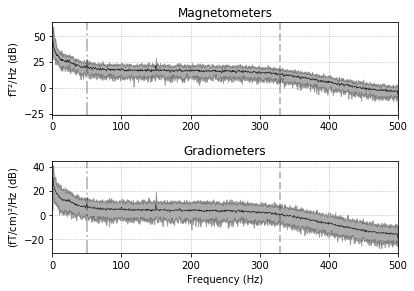

In [4]:
raw = mne.concatenate_raws([mne.io.read_raw_fif(fetch('ZYF_Test_{}'.format(j))) for j in [3, 5, 7]])
raw.load_data()
raw.plot_psd(area_mode='range', tmax=10.0, show=False, average=True)
events = mne.find_events(raw)

180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 180 events and 4001 original time points ...
0 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: STI005, STI008, IAS_Y, IAS_DY, IAS_DX, IAS_Z, STI003, IAS_X, IASX-, SYS201, STI006, IASY-, STI002, IASY+, IASZ+, STI007, STI004, IASX+, IASZ-, BIO001, STI101, STI001
[done]
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
Loading data for 180 events and 4001 original time points ...
0 bad epochs dropped
Subtracting Evoked from Epochs
    The following channels are not included in the subtraction: STI005, STI008, IAS_Y, IAS_DY, IAS_DX, IAS_Z, STI003, IAS_X, IASX-, SYS201, STI006, IASY-, STI002, IASY+, IASZ+, STI007, STI004, IASX+, IASZ-, BIO001, STI101, STI001
[done]
180 matching events found
Applying baseline correction (mode: 

Text(0.5, 0, 'Time [ms]')

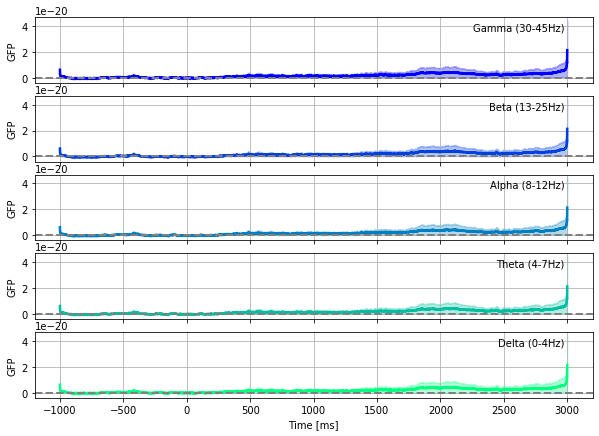

In [9]:
iter_freqs = [
    ('Delta', 0, 4),
    ('Theta', 4, 7),
    ('Alpha', 8, 12),
    ('Beta', 13, 25),
    ('Gamma', 30, 45)
]
tmin, tmax = -1., 3.

frequency_map = []

for band, fmin, fmax in iter_freqs:
    _epochs = mne.Epochs(raw, events=events, tmin=tmin, tmax=tmax, preload=True)
    _epochs.subtract_evoked()
    _epochs.apply_hilbert(envelope=True)
    frequency_map.append(((band, fmin, fmax), _epochs.average()))
    del _epochs
    
# Helper function for plotting spread
def stat_fun(x):
    """Return sum of squares."""
    return np.sum(x ** 2, axis=0)

# Plot
fig, axes = plt.subplots(5, 1, figsize=(10, 7), sharex=True, sharey=True)
colors = plt.get_cmap('winter_r')(np.linspace(0, 1, 5))
for ((freq_name, fmin, fmax), average), color, ax in zip(
        frequency_map, colors, axes.ravel()[::-1]):
    times = average.times * 1e3
    gfp = np.sum(average.data ** 2, axis=0)
    gfp = mne.baseline.rescale(gfp, times, baseline=(None, 0))
    ax.plot(times, gfp, label=freq_name, color=color, linewidth=2.5)
    ax.axhline(0, linestyle='--', color='grey', linewidth=2)
    ci_low, ci_up = mne.stats.bootstrap_confidence_interval(average.data, random_state=0,
                                                  stat_fun=stat_fun)
    ci_low = mne.baseline.rescale(ci_low, average.times, baseline=(None, 0))
    ci_up = mne.baseline.rescale(ci_up, average.times, baseline=(None, 0))
    ax.fill_between(times, gfp + ci_up, gfp - ci_low, color=color, alpha=0.3)
    ax.grid(True)
    ax.set_ylabel('GFP')
    ax.annotate('%s (%d-%dHz)' % (freq_name, fmin, fmax),
                xy=(0.95, 0.8),
                horizontalalignment='right',
                xycoords='axes fraction')

axes.ravel()[-1].set_xlabel('Time [ms]')

180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
8
Loading data for 45 events and 701 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 45 events and 701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


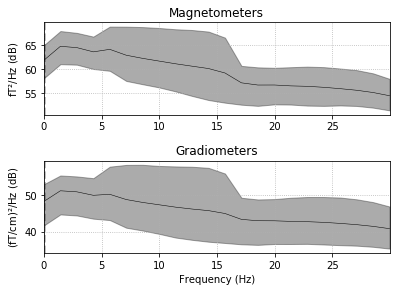

16
Loading data for 45 events and 701 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 45 events and 701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


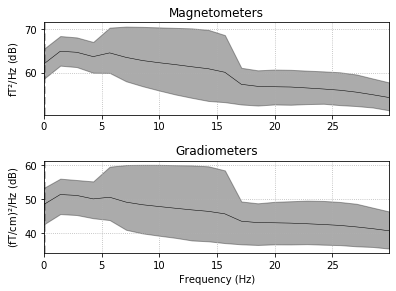

32
Loading data for 45 events and 701 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 45 events and 701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


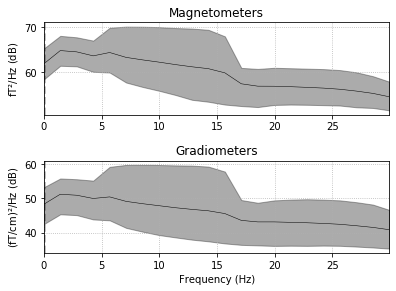

64
Loading data for 45 events and 701 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Loading data for 45 events and 701 original time points ...
    Using multitaper spectrum estimation with 7 DPSS windows


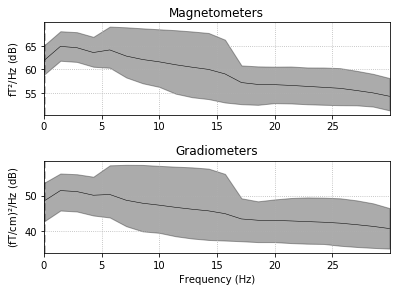

<Epochs  |   180 events (good & bad), -0.2 - 0.5 sec, baseline [None, 0], ~5.5 MB, data not loaded,
 '16': 45
 '32': 45
 '64': 45
 '8': 45>

In [12]:
epochs = mne.Epochs(raw, events=events)
event_id = epochs.event_id
times = epochs.times
for event in event_id:
    print(event)
    epochs[event].plot_psd(area_mode='range', fmin=0, fmax=30, spatial_colors=True, average=True)
epochs

--------------------------------------------------------------------------------
('Delta', 0, 4)
Filtering raw data in 3 contiguous segments
Setting up low-pass filter at 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1651 samples (1.651 sec)

8
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '8' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


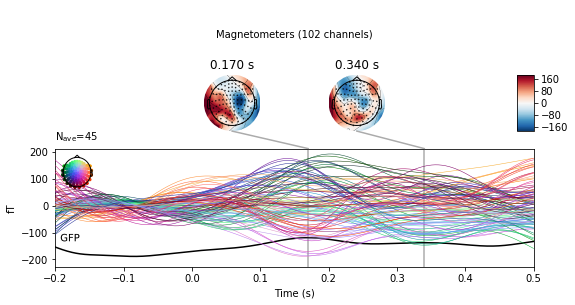

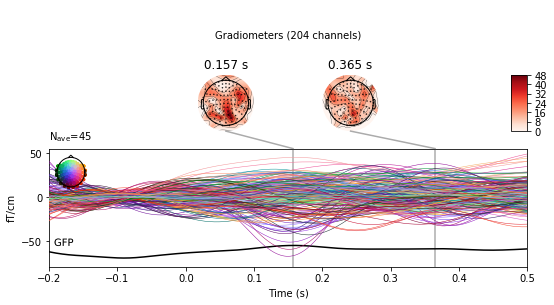

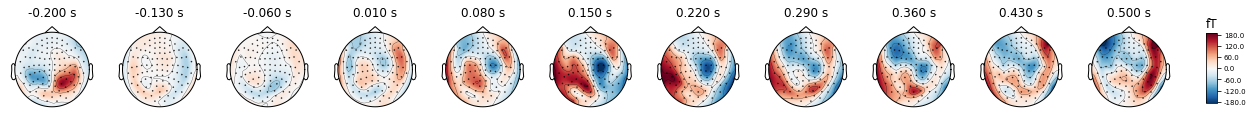

16
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '16' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


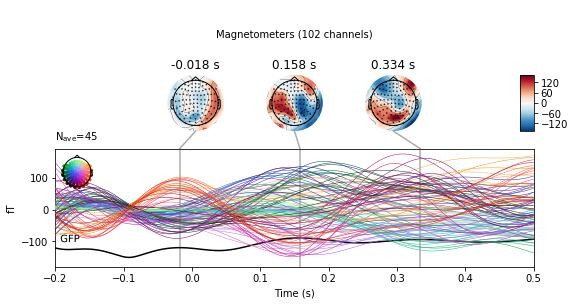

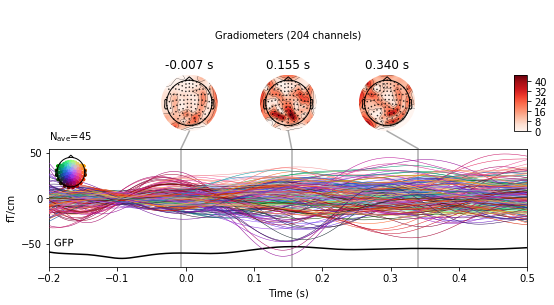

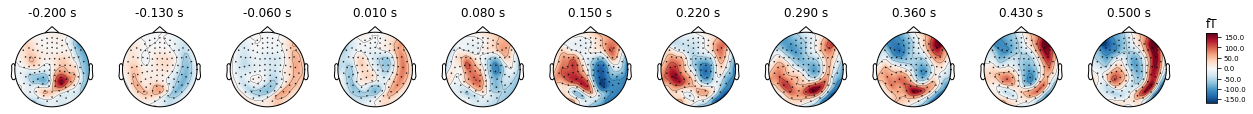

32
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '32' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


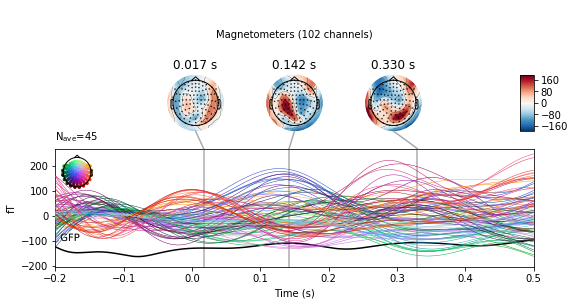

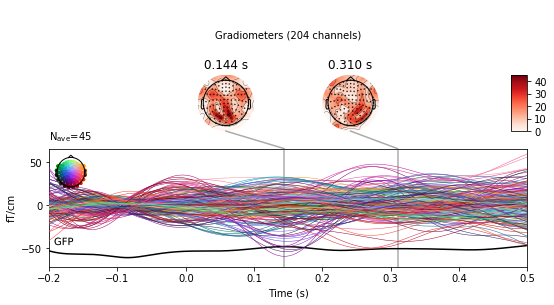

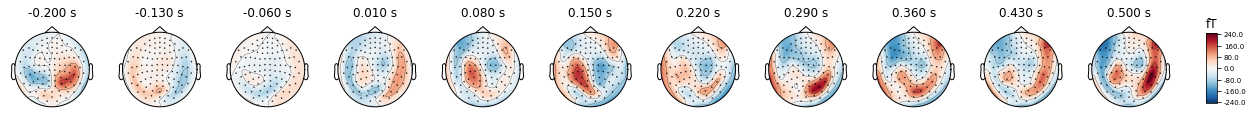

64
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '64' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


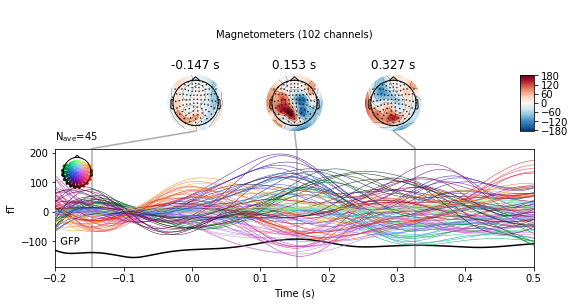

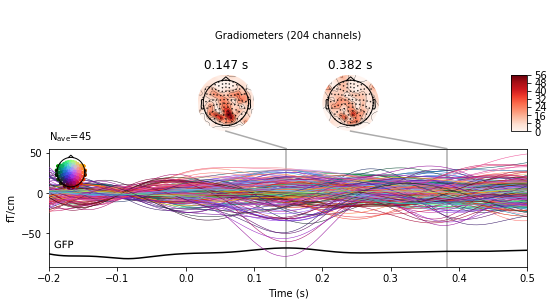

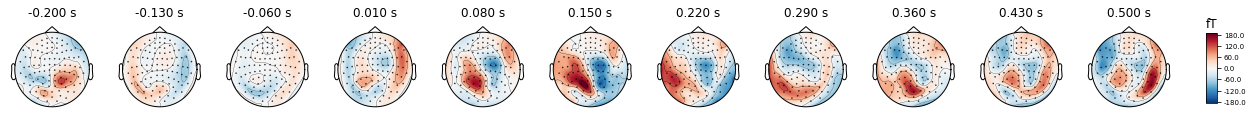

--------------------------------------------------------------------------------
('Theta', 4, 7)
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 1651 samples (1.651 sec)

8
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '8' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


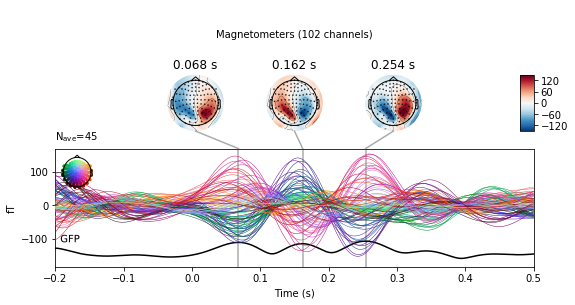

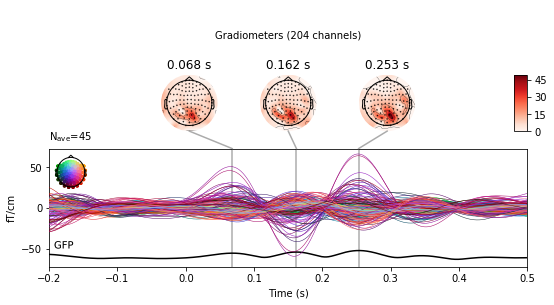

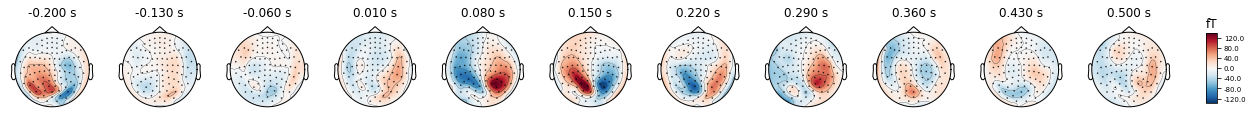

16
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '16' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


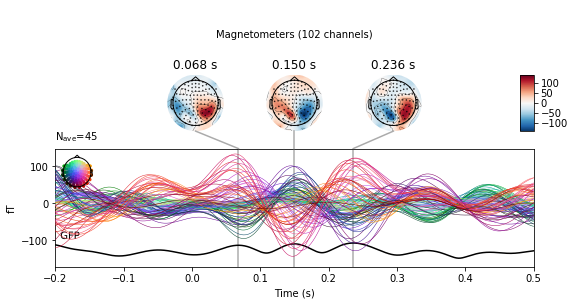

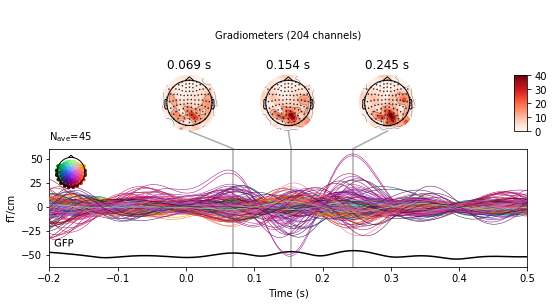

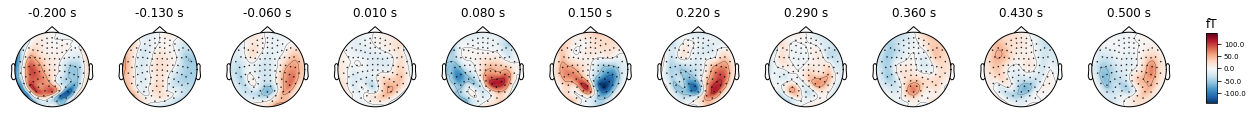

32
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '32' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


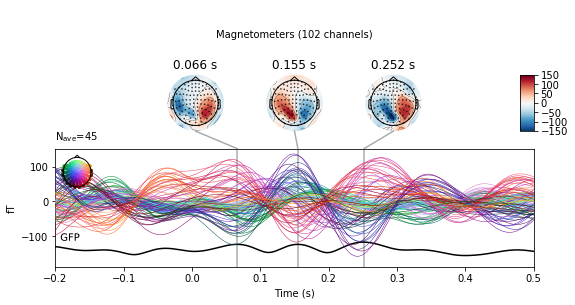

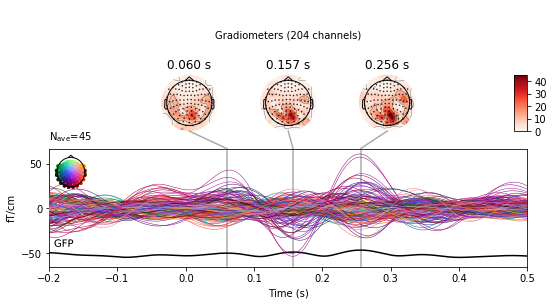

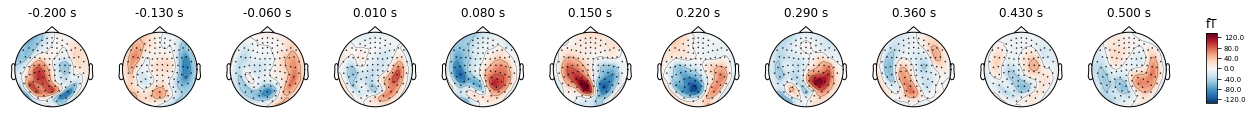

64
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '64' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


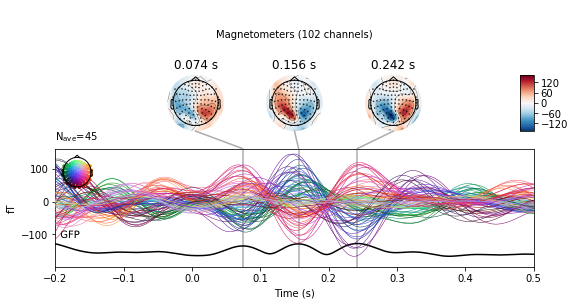

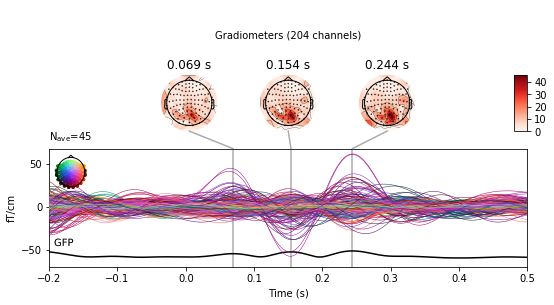

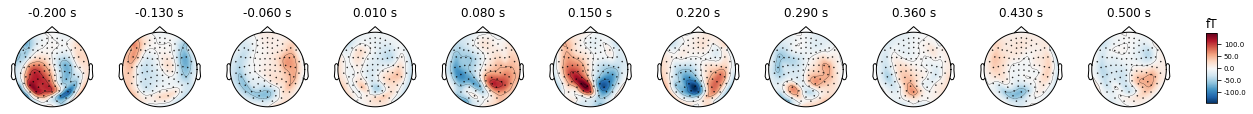

--------------------------------------------------------------------------------
('Alpha', 8, 12)
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 8 - 12 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 8.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 7.00 Hz)
- Upper passband edge: 12.00 Hz
- Upper transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 13.50 Hz)
- Filter length: 1651 samples (1.651 sec)

8
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '8' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


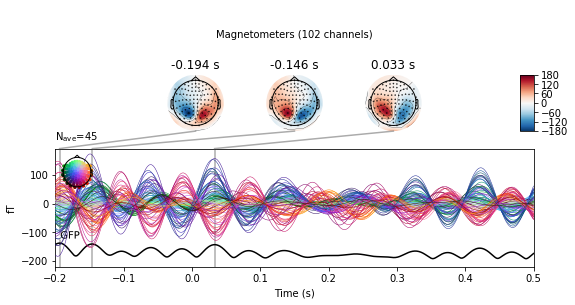

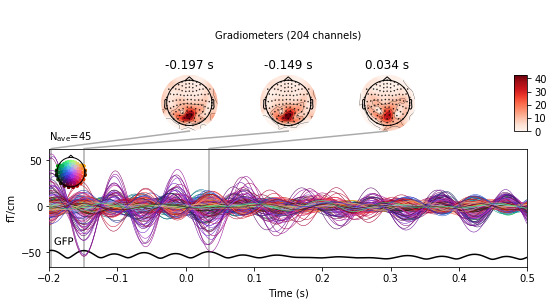

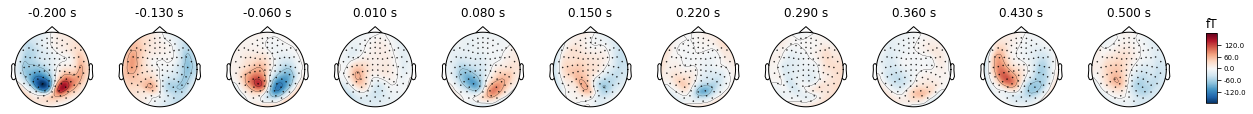

16
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '16' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


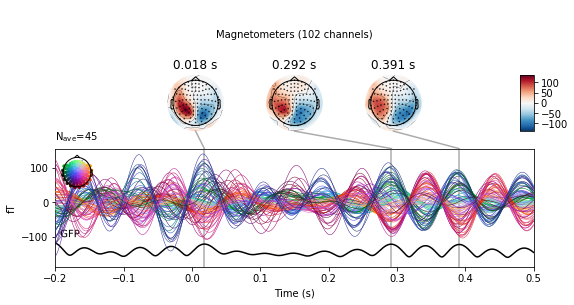

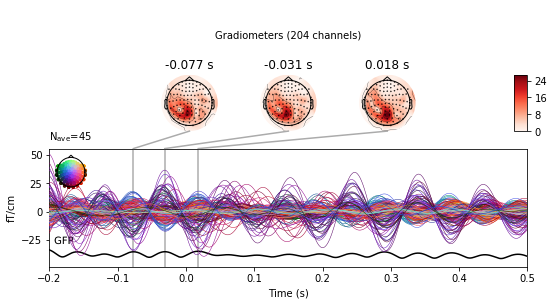

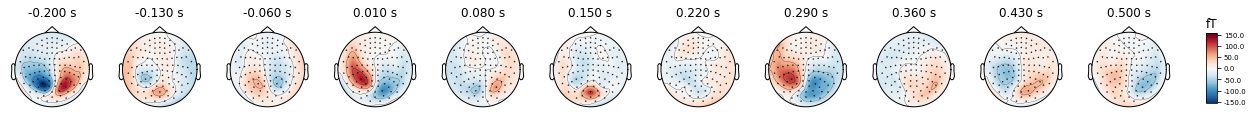

32
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '32' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


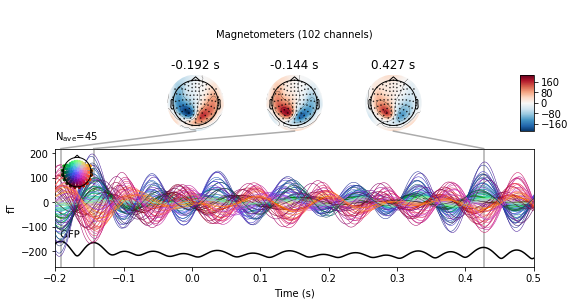

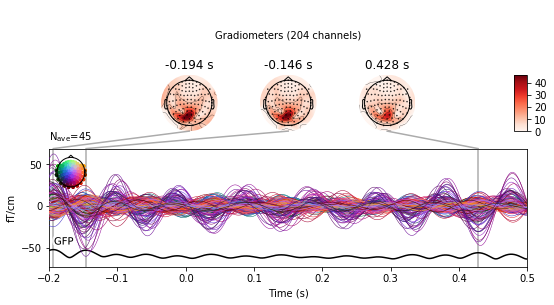

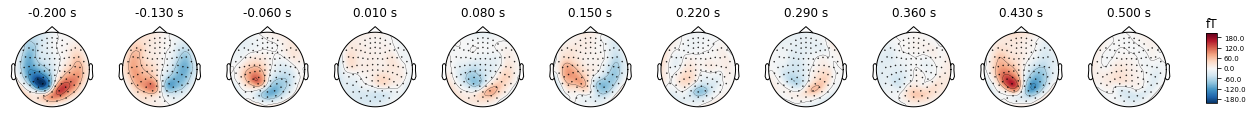

64
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '64' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


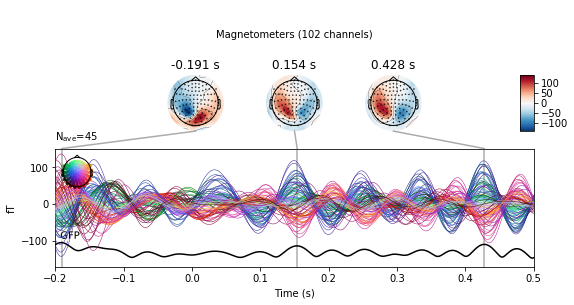

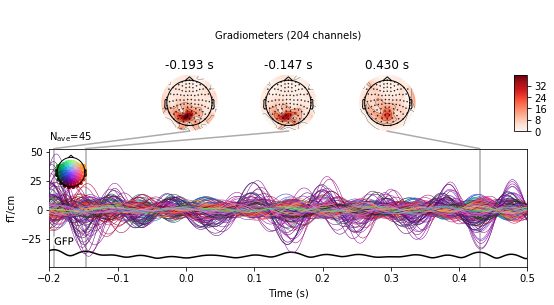

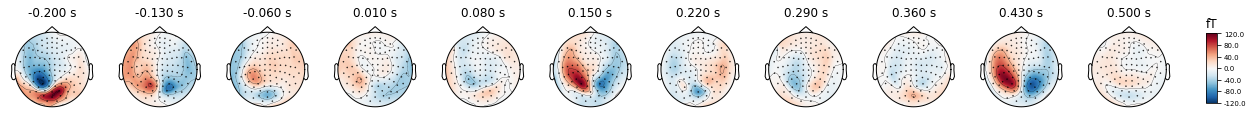

--------------------------------------------------------------------------------
('Beta', 13, 25)
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 13 - 25 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 13.00
- Lower transition bandwidth: 3.25 Hz (-6 dB cutoff frequency: 11.38 Hz)
- Upper passband edge: 25.00 Hz
- Upper transition bandwidth: 6.25 Hz (-6 dB cutoff frequency: 28.12 Hz)
- Filter length: 1015 samples (1.015 sec)

8
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '8' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


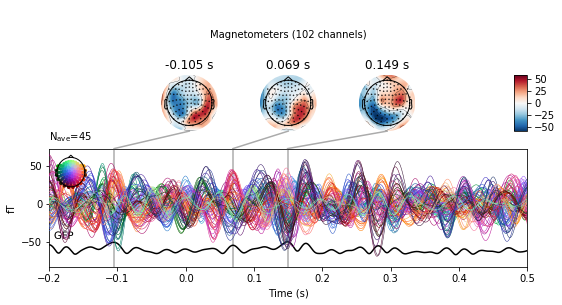

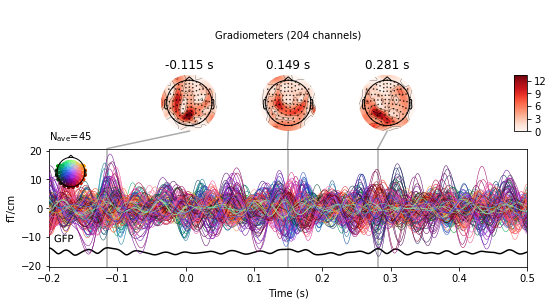

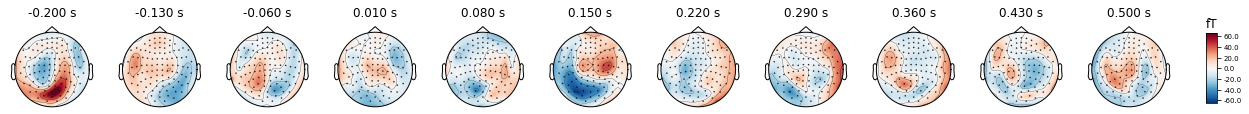

16
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '16' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


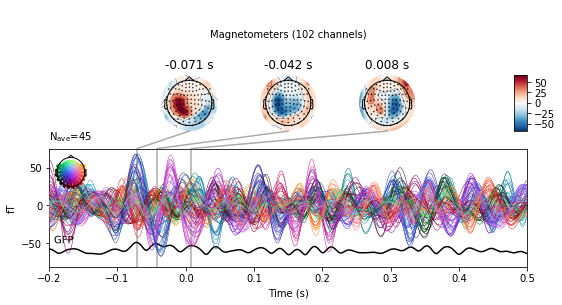

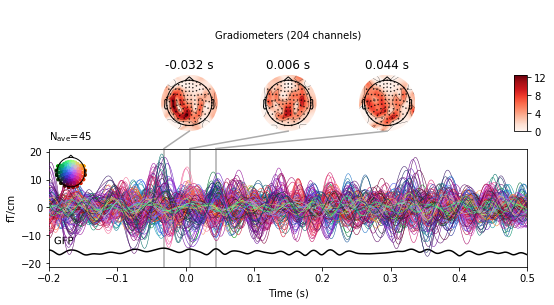

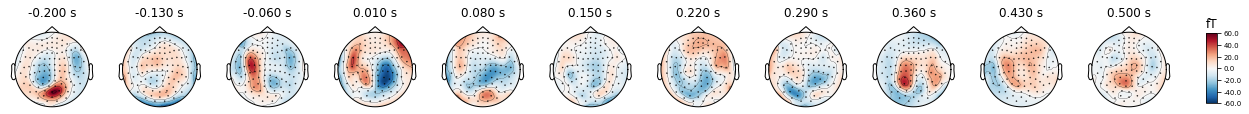

32
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '32' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


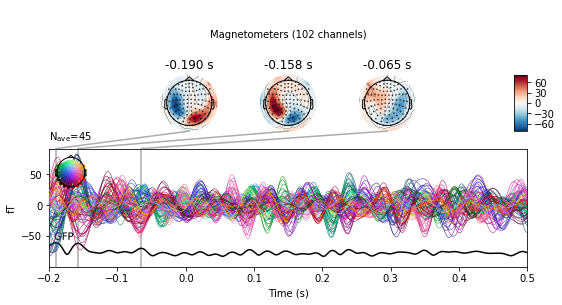

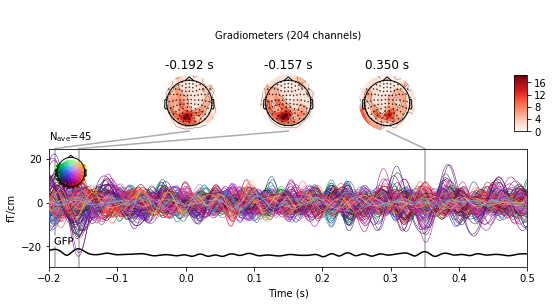

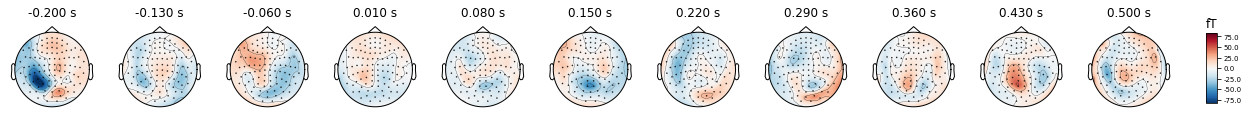

64
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '64' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


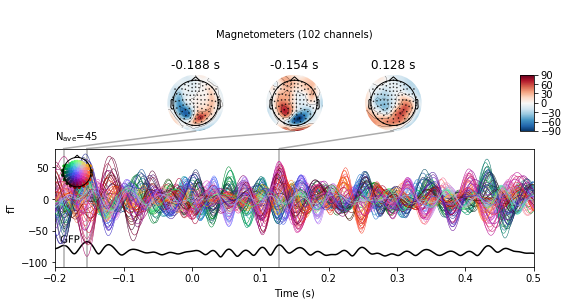

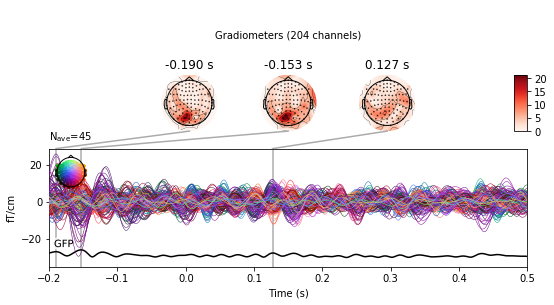

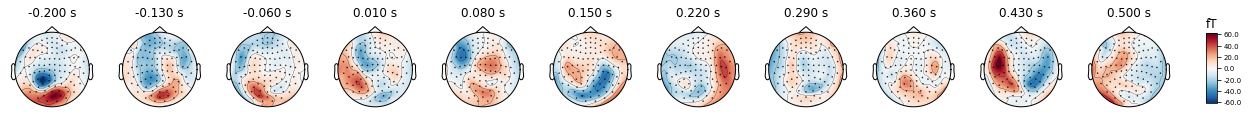

--------------------------------------------------------------------------------
('Gamma', 30, 45)
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 30 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 30.00
- Lower transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 26.25 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 441 samples (0.441 sec)

8
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '8' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


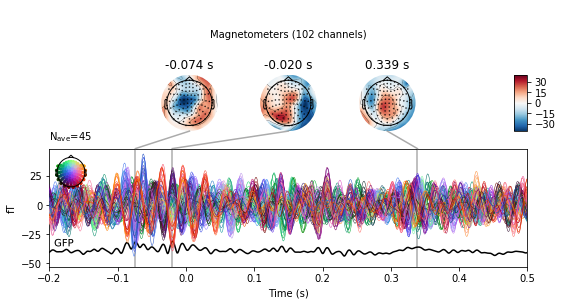

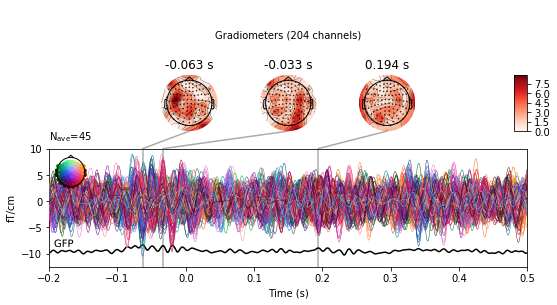

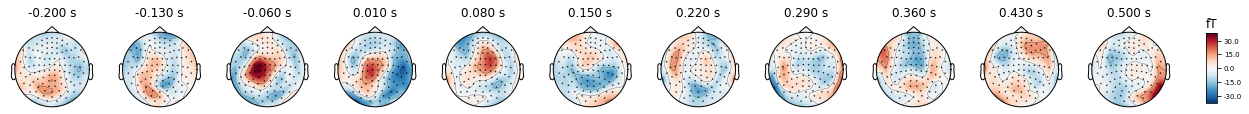

16
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '16' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


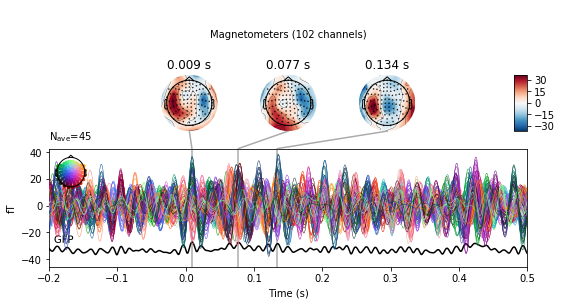

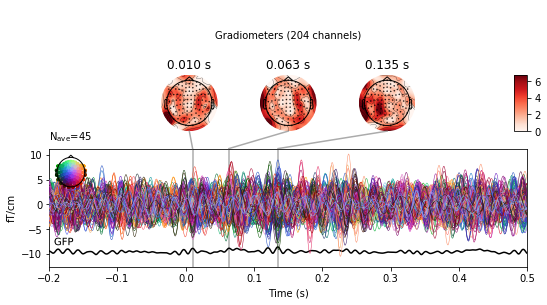

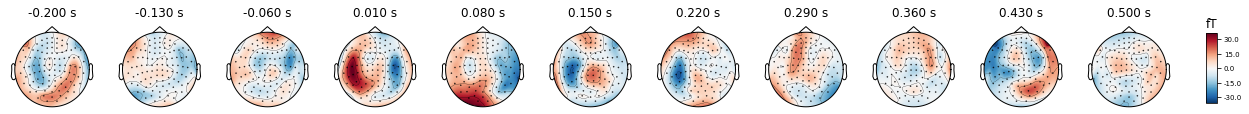

32
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '32' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


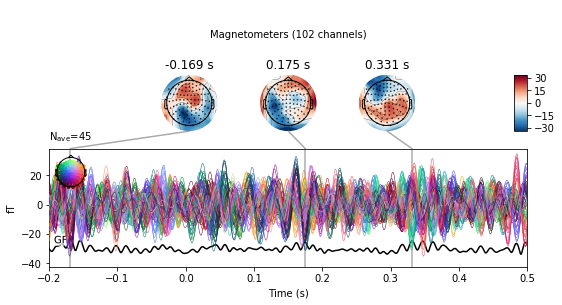

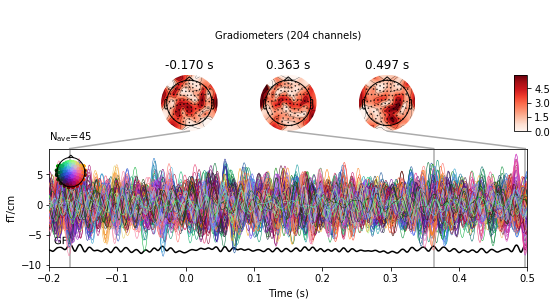

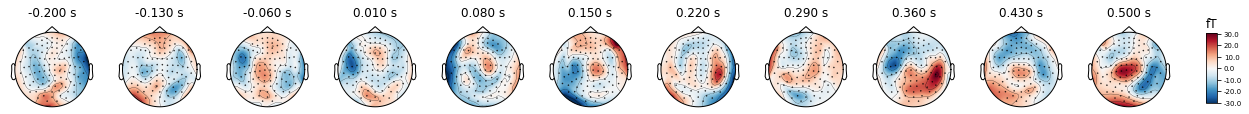

64
180 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
0 projection items activated
<Evoked  |  '64' (average, N=45), [-0.2, 0.5] sec, 306 ch, ~7.1 MB>


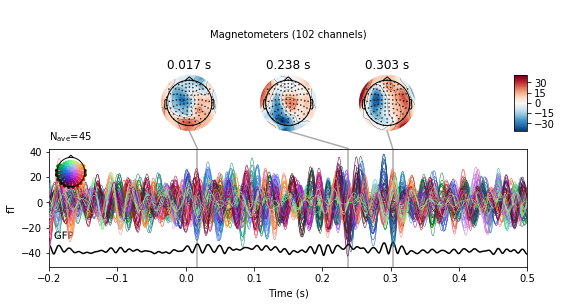

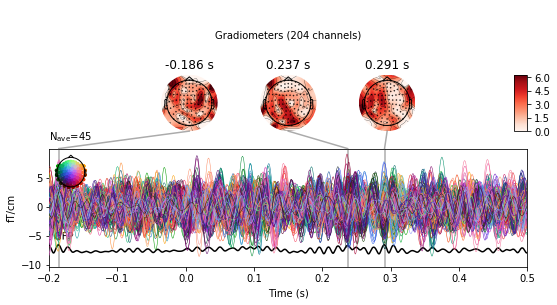

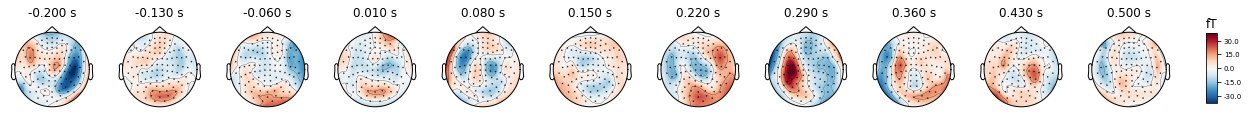

In [16]:
for freqs in iter_freqs:
    print('-' * 80)
    print(freqs)
    _raw = raw.copy()
    _raw.load_data()
    _raw.filter(l_freq=freqs[1], h_freq=freqs[2])
    for event in event_id:
        print(event)
        _epochs = mne.Epochs(_raw, events=events)
        evoked = _epochs[event].average()
        print(evoked)
        evoked.plot_joint(ts_args=dict(gfp=True))
        evoked.plot_topomap(times[::70])